In [342]:
import pandas as pd
import time
import datetime
import numpy as np
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

# 一、读微博发布内容分类表

In [343]:
with open('微博api数据/微博发布内容分类表-EWS_STAT_WEIBO_WEIBOINFO.csv', encoding='gb18030') as f:
    ctt = pd.read_csv(f)
ctt.head()

,ID,STATDATE,STATID,CREATETIME,UPDATETIME,TASKID,TASKCHANNELID,WEIBOID,YUEDU,COMM,REP,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID
0,3585,2017-08-22,1,2017/8/22 21:00:00,2017/8/22 22:00:01,10173,115,4143647517443156,0,2,0,6,2017/8/22 20:46:56,http://t.cn/h91BSI【升级气象灾害应急响应通知】据市气象台监测，广州市达到启...,升级气象灾害应急响应通知,NaN,NaN,NaN,NaN
1,3586,2017-08-22,1,2017/8/22 21:00:00,2017/8/22 21:00:00,0,0,4143644669856576,0,9,1,3,2017/8/22 20:35:37,转发微博,NaN,NaN,NaN,NaN,NaN
2,3641,2017-08-23,1,2017/8/23 17:00:00,2017/8/23 17:00:00,0,0,4143943631189483,0,30,5,7,2017/8/23 16:23:34,http://t.cn/h91BSI【台风紧急警报】今天下午16时，今年第13号台风“天鸽”...,台风紧急警报,10.0,台风消息,NaN,NaN
3,3642,2017-08-23,1,2017/8/23 17:00:00,2017/8/24 16:00:04,0,0,4143938828956326,0,51,9,29,2017/8/23 16:04:30,【七天天气预报—“天鸽”上岸，仍有风雨】#天气话你知# #13号台风天鸽# 强台风“天鸽”已...,七天天气预报—“天鸽”上岸，仍有风雨,NaN,NaN,天气话你知,174.0
4,3643,2017-08-23,1,2017/8/23 18:00:00,2017/8/23 20:00:00,0,0,4143958235928274,0,37,7,6,2017/8/23 17:21:37,http://t.cn/h91BSI【台风蓝色预警信号】今年第13号台风“天鸽”，23日17...,台风蓝色预警信号,7.0,广州天气预警,NaN,NaN


# 二、将微博发布内容表与主题挖掘结果表合并

In [344]:
df = pd.read_csv('clustered_labelled.csv',
                 encoding='gb18030',
#                  names=['ID', 'STATDATE', '预报内容', '预警内容', '预警级别', '预警持续期', '微博种类', '是否包含链接', 'length', '阴历', '星期', '是否周中或周末', '是否上班或节假日', '所属分类', 'TEXT']
                )
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,番禺区,南沙区,从化区,增城区,是否包含表情,length,阴历,星期,是否周中或周末,是否上班或节假日
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,10,27初二,四,周中,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,2,27初二,四,周中,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN


In [345]:
# pd.set_option('display.max_rows', None)

In [346]:
res = pd.merge(left=df, right=ctt, how='left', left_on='id', right_on='ID')
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,COMM,REP,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,0,0,0,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,37,10,33,2017/4/27 16:15:00,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,七天天气预报—天气不错宜晾晒,NaN,NaN,天气话你知,174.0
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,5,0,1,2017/4/27 17:01:06,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,广州下班天气,6.0,广州下班天气,NaN,NaN
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,8,1,19,2017/4/27 16:56:19,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],NaN,NaN,NaN,随手拍广州,175.0
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,7,0,5,2017/4/27 14:31:25,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,NaN,NaN,NaN,小编8天气,126.0
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,45,3,20,2017/4/27 14:12:51,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],NaN,NaN,NaN,小编8天气,126.0


In [347]:
res.shape

(7428, 46)

In [348]:
# res.to_csv('result.csv', encoding='gb18030')

In [349]:
res.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,COMM,REP,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,0,0,0,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN


In [350]:
res.columns

Index(['id', 'statdate', 'text', '所属分类', '预报内容', '预警内容', '预警级别', '预警信号',
       '微博种类', '是否包含链接', '越秀区', '海珠区', '荔湾区', '天河区', '白云区', '黄埔区', '花都区',
       '番禺区', '南沙区', '从化区', '增城区', '是否包含表情', 'length', '阴历', '星期', '是否周中或周末',
       '是否上班或节假日', 'ID', 'STATDATE', 'STATID', 'CREATETIME', 'UPDATETIME',
       'TASKID', 'TASKCHANNELID', 'WEIBOID', 'YUEDU', 'COMM', 'REP', 'PRA',
       'CREATEDAT', 'TEXT', 'PRO_WBNAME', 'PROID', 'PRO_NAME', 'LIST',
       'LISTID'],
      dtype='object')

In [351]:
table = res.describe()
table.loc[['mean', 'min', 'max'],['COMM', 'REP', 'PRA']]
# table['COMM', 'REP', 'PRA']

,COMM,REP,PRA
mean,24.063274,5.029618,16.054254
min,0.000000,0.000000,0.000000
max,1439.000000,2010.000000,389.000000


In [352]:
print(res.COMM.sum()/366)
print(res.REP.sum()/366)
print(res.PRA.sum()/366)

488.3661202185792
102.07650273224044
325.8224043715847


# 三、数据重编码

In [353]:
res.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,COMM,REP,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,0,0,0,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,0,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN


In [354]:
res.shape

(7428, 46)

## 3.1 根据评论数（COMM）及其分位数将微博分为10种，并标记

In [355]:
res.COMM.describe()

count    7428.000000
mean       24.063274
std        33.133629
min         0.000000
25%         6.000000
50%        14.500000
75%        31.000000
max      1439.000000
Name: COMM, dtype: float64

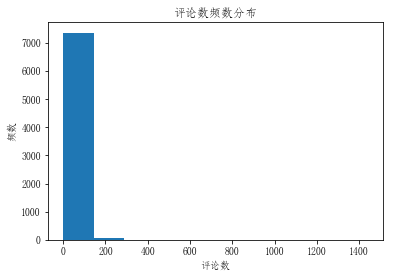

In [356]:
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    pyplot.hist(heights, 10)
    pyplot.xlabel('评论数')
    pyplot.ylabel('频数')
    pyplot.title('评论数频数分布')
    pyplot.show()

drawHist(res.COMM)

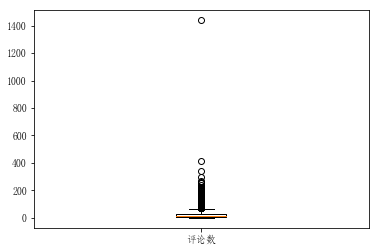

In [357]:
from matplotlib import pyplot

#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    pyplot.boxplot([heights], labels=['评论数'])
#     pyplot.title('Heights Of Male Students')
    pyplot.show()

drawBox(res.COMM)

In [358]:
np.median(res.COMM)#中位数

14.5

In [359]:
pd.Series(np.percentile(res.COMM, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))#分位数

0        0.0
1        2.0
2        4.0
3        7.0
4       10.0
5       14.5
6       20.0
7       27.0
8       37.0
9       56.0
10    1439.0
dtype: float64

In [360]:
res.loc[(res.COMM >= 0) & (res.COMM < 2), 'grade_of_COMM'] = '1'
res.loc[(res.COMM >= 2) & (res.COMM < 4), 'grade_of_COMM'] = '2'
res.loc[(res.COMM >= 4) & (res.COMM < 7), 'grade_of_COMM'] = '3'
res.loc[(res.COMM >= 7) & (res.COMM < 10), 'grade_of_COMM'] = '4'
res.loc[(res.COMM >= 10) & (res.COMM < 14.5), 'grade_of_COMM'] = '5'
res.loc[(res.COMM >= 14.5) & (res.COMM < 20), 'grade_of_COMM'] = '6'
res.loc[(res.COMM >= 20) & (res.COMM < 27), 'grade_of_COMM'] = '7'
res.loc[(res.COMM >= 27) & (res.COMM < 37), 'grade_of_COMM'] = '8'
res.loc[(res.COMM >= 37) & (res.COMM < 56), 'grade_of_COMM'] = '9'
res.loc[(res.COMM >= 56) & (res.COMM <= 1439), 'grade_of_COMM'] = '10'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,REP,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID,grade_of_COMM
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,0,0,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN,1
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN,1
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN,1
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN,1
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,0,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN,1
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,10,33,2017/4/27 16:15:00,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,七天天气预报—天气不错宜晾晒,NaN,NaN,天气话你知,174.0,9
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,0,1,2017/4/27 17:01:06,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,广州下班天气,6.0,广州下班天气,NaN,NaN,3
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,1,19,2017/4/27 16:56:19,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],NaN,NaN,NaN,随手拍广州,175.0,4
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,0,5,2017/4/27 14:31:25,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,NaN,NaN,NaN,小编8天气,126.0,4
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,3,20,2017/4/27 14:12:51,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],NaN,NaN,NaN,小编8天气,126.0,9


## 3.2 根据转发数（REP）及其分位数将微博分为10种，并标记

In [361]:
res.REP.describe()

count    7428.000000
mean        5.029618
std        29.242129
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      2010.000000
Name: REP, dtype: float64

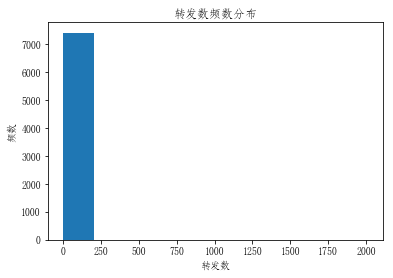

In [362]:
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    pyplot.hist(heights, 10)
    pyplot.xlabel('转发数')
    pyplot.ylabel('频数')
    pyplot.title('转发数频数分布')
    pyplot.show()

drawHist(res.REP)

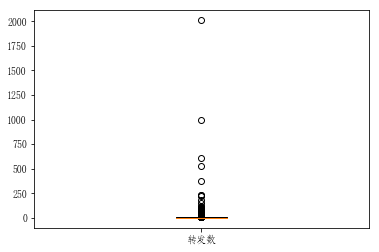

In [363]:
from matplotlib import pyplot

#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    pyplot.boxplot([heights], labels=['转发数'])
#     pyplot.title('Heights Of Male Students')
    pyplot.show()

drawBox(res.REP)

In [364]:
np.median(res.REP)#中位数

2.0

In [365]:
pd.Series(np.percentile(res.REP, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))#分位数

0        0.0
1        0.0
2        0.0
3        1.0
4        2.0
5        2.0
6        3.0
7        4.0
8        6.0
9       10.0
10    2010.0
dtype: float64

In [366]:
res.loc[(res.REP >= 0) & (res.REP < 0), 'grade_of_REP'] = '1'
res.loc[(res.REP >= 0) & (res.REP < 0), 'grade_of_REP'] = '2'
res.loc[(res.REP >= 0) & (res.REP < 1), 'grade_of_REP'] = '3'
res.loc[(res.REP >= 1) & (res.REP < 2), 'grade_of_REP'] = '4'
res.loc[(res.REP >= 2) & (res.REP < 2), 'grade_of_REP'] = '5'
res.loc[(res.REP >= 2) & (res.REP < 3), 'grade_of_REP'] = '6'
res.loc[(res.REP >= 3) & (res.REP < 4), 'grade_of_REP'] = '7'
res.loc[(res.REP >= 4) & (res.REP < 6), 'grade_of_REP'] = '8'
res.loc[(res.REP >= 6) & (res.REP < 10), 'grade_of_REP'] = '9'
res.loc[(res.REP >= 10) & (res.REP <= 2010), 'grade_of_REP'] = '10'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,PRA,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID,grade_of_COMM,grade_of_REP
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,0,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN,1,3
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN,1,3
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN,1,3
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN,1,3
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,0,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN,1,3
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,33,2017/4/27 16:15:00,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,七天天气预报—天气不错宜晾晒,NaN,NaN,天气话你知,174.0,9,10
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,1,2017/4/27 17:01:06,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,广州下班天气,6.0,广州下班天气,NaN,NaN,3,3
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,19,2017/4/27 16:56:19,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],NaN,NaN,NaN,随手拍广州,175.0,4,4
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,5,2017/4/27 14:31:25,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,NaN,NaN,NaN,小编8天气,126.0,4,3
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,20,2017/4/27 14:12:51,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],NaN,NaN,NaN,小编8天气,126.0,9,7


## 3.3 根据点赞数（PRA）及其分位数将微博分为10种，并标记

In [367]:
res.PRA.describe()

count    7428.000000
mean       16.054254
std        20.417360
min         0.000000
25%         5.000000
50%        10.000000
75%        21.000000
max       389.000000
Name: PRA, dtype: float64

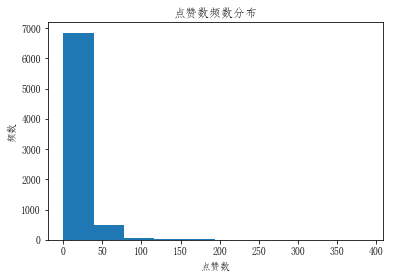

In [368]:
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    pyplot.hist(heights, 10)
    pyplot.xlabel('点赞数')
    pyplot.ylabel('频数')
    pyplot.title('点赞数频数分布')
    pyplot.show()

drawHist(res.PRA)

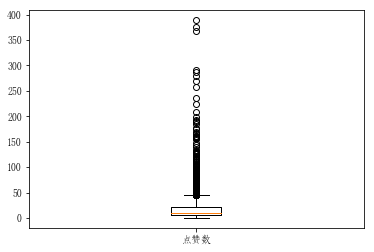

In [369]:
from matplotlib import pyplot

#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    pyplot.boxplot([heights], labels=['点赞数'])
#     pyplot.title('Heights Of Male Students')
    pyplot.show()

drawBox(res.PRA)

In [370]:
np.median(res.PRA)#中位数

10.0

In [371]:
pd.Series(np.percentile(res.PRA, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))#分位数

0       0.0
1       2.0
2       4.0
3       6.0
4       8.0
5      10.0
6      14.0
7      18.0
8      24.0
9      34.3
10    389.0
dtype: float64

In [372]:
res.loc[(res.PRA >= 0) & (res.PRA < 2), 'grade_of_PRA'] = '1'
res.loc[(res.PRA >= 2) & (res.PRA < 4), 'grade_of_PRA'] = '2'
res.loc[(res.PRA >= 4) & (res.PRA < 6), 'grade_of_PRA'] = '3'
res.loc[(res.PRA >= 6) & (res.PRA < 8), 'grade_of_PRA'] = '4'
res.loc[(res.PRA >= 8) & (res.PRA < 10), 'grade_of_PRA'] = '5'
res.loc[(res.PRA >= 10) & (res.PRA < 14), 'grade_of_PRA'] = '6'
res.loc[(res.PRA >= 14) & (res.PRA < 18), 'grade_of_PRA'] = '7'
res.loc[(res.PRA >= 18) & (res.PRA < 24), 'grade_of_PRA'] = '8'
res.loc[(res.PRA >= 24) & (res.PRA < 34.3), 'grade_of_PRA'] = '9'
res.loc[(res.PRA >= 34.3) & (res.PRA <= 389), 'grade_of_PRA'] = '10'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,CREATEDAT,TEXT,PRO_WBNAME,PROID,PRO_NAME,LIST,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,2017/4/27 13:58:50,【微博测试】微博测试,微博测试,NaN,NaN,NaN,NaN,1,3,1
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,2017/4/26 17:28:11,转发,NaN,NaN,NaN,NaN,NaN,1,3,1
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,2017/4/26 17:27:11,转发微博,NaN,NaN,NaN,NaN,NaN,1,3,1
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,2017/4/26 17:27:03,转发微博,NaN,NaN,NaN,NaN,NaN,1,3,1
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,2017/4/26 17:25:52,转发微博,NaN,NaN,NaN,NaN,NaN,1,3,1
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,2017/4/27 16:15:00,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,七天天气预报—天气不错宜晾晒,NaN,NaN,天气话你知,174.0,9,10,9
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,2017/4/27 17:01:06,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,广州下班天气,6.0,广州下班天气,NaN,NaN,3,3,1
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,2017/4/27 16:56:19,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],NaN,NaN,NaN,随手拍广州,175.0,4,4,8
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,2017/4/27 14:31:25,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,NaN,NaN,NaN,小编8天气,126.0,4,3,3
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,2017/4/27 14:12:51,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],NaN,NaN,NaN,小编8天气,126.0,9,7,8


In [373]:
# res.to_csv('res.csv', encoding='gb18030')

# 标题挖掘

In [374]:
# res.PRO_NAME.isna().head()

In [375]:
# res.loc[:, ['PRO_WBNAME', 'PRO_NAME', 'LIST']].isna().sum()

## PRO_WBNAME标题挖掘

In [376]:
res.shape

(7428, 49)

In [377]:
res.LIST.value_counts(dropna=False).head()

NaN      2386
天气话你知    1736
小编8天气    1282
随手拍广州     839
晚安，广州     158
Name: LIST, dtype: int64

In [378]:
res.LIST.fillna(value='未填', inplace=True)

In [379]:
res.LIST.value_counts().head()

未填       2386
天气话你知    1736
小编8天气    1282
随手拍广州     839
晚安，广州     158
Name: LIST, dtype: int64

In [380]:
X = res.loc[:, ['LIST']]    #之前写成X = df[['comment']]

In [381]:
X.shape

(7428, 1)

In [382]:
X.head()

,LIST
0,未填
1,未填
2,未填
3,未填
4,未填


In [383]:
X.dtypes

LIST    object
dtype: object

In [384]:
import jieba

In [385]:
def chinese_word_cut(mytext):
    return ' '.join(jieba.cut(mytext))

In [386]:
jieba.load_userdict("userdict_weibo.txt")

In [387]:
%%time
X['cutted_text'] = X.LIST.apply(chinese_word_cut)

Wall time: 305 ms


In [388]:
# X.head()

In [389]:
X.shape

(7428, 2)

In [390]:
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file, encoding='utf-8') as f:
        stopwords = f.read( )
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

In [391]:
stop_words_file = 'mystopwords.txt'
stopwords = get_custom_stopwords(stop_words_file)

In [392]:
stopwords[-10:]

['没错', '缓慢', '增加', '务必', '较强', '辐射', '时段', '雷雨', '', '']

In [393]:
from sklearn.feature_extraction.text import CountVectorizer

In [394]:
vect = CountVectorizer()

In [395]:
term_matrix = pd.DataFrame(vect.fit_transform(X.cutted_text).toarray(), columns=vect.get_feature_names())

In [396]:
term_matrix.head()

,12,12生日快乐,13号台风天鸽,14号台风帕克,14号台风帕卡,16号台风玛娃,18号台风泰利,2017,2017初台,2017国庆中秋天气,...,随手拍昨日广州,随手拍蓝天,雨水节气,霍金离世,韶关,韶关南岭国家森林公园下雪,预报员最近有点皮啊,预防,首席和你聊聊春节天气那些事儿,高温来袭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
term_matrix.shape

(7428, 225)

In [398]:
# df.head()

# df.shape

# %%time
# frames = [df['id'], df['statdate'], term_matrix]
# result = pd.concat(frames, axis = 1)

# result.head()

# result.shape

# %%time
# result.to_csv('output.csv', encoding='gb18030')

vect = CountVectorizer(stop_words=frozenset(stopwords)) #加上停用词去除功能

In [399]:
term_matrix = pd.DataFrame(vect.fit_transform(X.cutted_text).toarray(), columns=vect.get_feature_names())

In [400]:
term_matrix.head()

,12,12生日快乐,13号台风天鸽,14号台风帕克,14号台风帕卡,16号台风玛娃,18号台风泰利,2017,2017初台,2017国庆中秋天气,...,随手拍昨日广州,随手拍蓝天,雨水节气,霍金离世,韶关,韶关南岭国家森林公园下雪,预报员最近有点皮啊,预防,首席和你聊聊春节天气那些事儿,高温来袭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
max_df = 0.8 # 在超过这一比例的文档中出现的关键词（过于平凡），去除掉。
min_df = 3 # 在地狱这一数量的文档中出现的关键词（过于独特），去除掉。

In [402]:
vect = CountVectorizer(max_df=max_df,
                      min_df=min_df,
                      token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b',
                      stop_words=frozenset(stopwords))

In [403]:
term_matrix = pd.DataFrame(vect.fit_transform(X.cutted_text).toarray(), columns=vect.get_feature_names())

In [404]:
term_matrix.head()

,今日大雪,冬至冬至,午间一刻,嗨森一刻,大家8天气,天气公告,天气剧透,天气君撸猫日常,天气君的科普time,天气涂鸦,...,每日一图,气象汪日常,气象汪的日常,温馨提醒,百万粉丝回馈计划,美食时刻,视频报天气,超级月亮,随后拍广州,随手拍广州
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [405]:
n_features = 1000

In [406]:
tf_vectorizer = CountVectorizer(max_features=n_features,
                               max_df=max_df,
                               min_df=min_df,
                               token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b',
                               stop_words=frozenset(stopwords))

In [407]:
term_matrix = pd.DataFrame(tf_vectorizer.fit_transform(X.cutted_text).toarray(), columns=tf_vectorizer.get_feature_names())

In [408]:
term_matrix.head()

,今日大雪,冬至冬至,午间一刻,嗨森一刻,大家8天气,天气公告,天气剧透,天气君撸猫日常,天气君的科普time,天气涂鸦,...,每日一图,气象汪日常,气象汪的日常,温馨提醒,百万粉丝回馈计划,美食时刻,视频报天气,超级月亮,随后拍广州,随手拍广州
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [409]:
term_matrix.shape

(7428, 40)

In [410]:
df.shape

(7428, 27)

In [411]:
%%time
frames = [df['id'], df['statdate'], term_matrix]
result_handled = pd.concat(frames, axis = 1)

Wall time: 4 ms


In [412]:
result_handled.shape

(7428, 42)

In [413]:
result_handled.head()

,id,statdate,今日大雪,冬至冬至,午间一刻,嗨森一刻,大家8天气,天气公告,天气剧透,天气君撸猫日常,...,每日一图,气象汪日常,气象汪的日常,温馨提醒,百万粉丝回馈计划,美食时刻,视频报天气,超级月亮,随后拍广州,随手拍广州
0,1149,2017/4/27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1150,2017/4/27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1151,2017/4/27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1152,2017/4/27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1153,2017/4/27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
# %%time
# result_handled.to_csv('output_handled.csv', encoding='gb18030')

In [415]:
tf = tf_vectorizer.fit_transform(X.cutted_text)

In [416]:
from sklearn.decomposition import LatentDirichletAllocation

In [417]:
n_topics = 5
lda = LatentDirichletAllocation(n_topics=n_topics,
                               max_iter=50,
                               learning_method='online',
                               learning_offset=50.,
                               random_state=0)

In [418]:
%%time
lda.fit(tf)

D:\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Wall time: 27.2 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [419]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #%d:' % topic_idx)
        print(' '.join([feature_names[i]
                      for i in topic.argsort()[:-n_top_words -1:-1]]))
    print()

In [420]:
n_top_words = 20

In [421]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
小编8天气 小编8科普 小编与首席的日常 天气话你知 广州天气预警 随手拍广州 今日大雪 冬至冬至 温馨提醒 帕卡影响广州 超级月亮 广州春运天气 天气公告 天气剧透 天气君的科普time 广州欢迎你 视频报天气 广州高考天气 天气福利 气象汪日常
Topic #1:
天气话你知 广州天气预警 小编8天气 小编与首席的日常 小编8科普 随手拍广州 今日大雪 冬至冬至 温馨提醒 帕卡影响广州 超级月亮 天气公告 广州春运天气 广州欢迎你 天气剧透 天气君的科普time 广州高考天气 视频报天气 天气福利 气象汪日常
Topic #2:
晚安 天气君撸猫日常 小编精分日常 气象汪的日常 每日一图 横渡珠江 我们的广州 天气要闻 政务v影响力峰会 天气君的科普time 美食时刻 广州暴雨 天气涂鸦 随后拍广州 百万粉丝回馈计划 温馨提醒 气象汪日常 强对流天气话你知 天气话你知 广州天气预警
Topic #3:
随手拍广州 天气话你知 广州天气预警 小编8天气 小编与首席的日常 小编8科普 今日大雪 冬至冬至 温馨提醒 帕卡影响广州 超级月亮 天气公告 广州春运天气 广州欢迎你 广州高考天气 视频报天气 天气剧透 天气君的科普time 大家8天气 午间一刻
Topic #4:
广州春运天气 天气剧透 小编随便8 嗨森一刻 广州高考天气 天气福利 超级月亮 帕卡影响广州 午间一刻 大家8天气 小编8美食 视频报天气 天气公告 广州欢迎你 冬至冬至 今日大雪 天气话你知 广州天气预警 小编8天气 小编与首席的日常



In [422]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      29.383440        1       1  0.391533  0.176771
0      23.904133        1       2  0.075638 -0.427740
3      18.857693        1       3 -0.086307  0.105223
4      14.064611        1       4 -0.194688  0.075452
2      13.790122        1       5 -0.186176  0.070294, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
12    Default  1315.000000       天气话你知  1315.000000  30.0000  30.0000
13    Default  1099.000000       小编8天气  1099.000000  29.0000  29.0000
39    Default   885.000000       随手拍广州   885.000000  28.0000  28.0000
28    Default   278.000000          晚安   278.000000  27.0000  27.0000
21    Default   225.000000      广州春运天气   225.000000  26.0000  26.0000
6     Default   188.000000        天气剧透   188.000000  25.0000  25.0000
7     Default    70.000000     天气君撸猫日常    70.000000  24.0000  24.0000
17    Default    63.000000      小编精分日常    63.000000  23.0000  23.0000
18    Default    57.000000       小编随便8    57.000000  22.0000  22.0000
32    Default    44.000000      气象汪的日常    44.000000  21.0000  21.0000
20    Default    72.000000      广州天气预警    72.000000  20.0000  20.0000
30    Default    35.000000        每日一图    35.000000  19.0000  19.0000
3     Default    33.000000        嗨森一刻    33.000000  18.0000  18.0000
29    Default    30.000000        横渡珠江    30.000000  17.0000  17.0000
24    Default    30.000000      广州高考天气    30.000000  16.0000  16.0000
26    Default    29.000000       我们的广州    29.000000  15.0000  15.0000
10    Default    28.000000        天气福利    28.000000  14.0000  14.0000
11    Default    20.000000        天气要闻    20.000000  13.0000  13.0000
37    Default    16.000000        超级月亮    16.000000  12.0000  12.0000
14    Default    22.000000       小编8科普    22.000000  11.0000  11.0000
27    Default    14.000000    政务v影响力峰会    14.000000  10.0000  10.0000
19    Default    14.000000      帕卡影响广州    14.000000   9.0000   9.0000
2     Default    13.000000        午间一刻    13.000000   8.0000   8.0000
4     Default    11.000000       大家8天气    11.000000   7.0000   7.0000
15    Default    11.000000       小编8美食    11.000000   6.0000   6.0000
8     Default    10.000000  天气君的科普time    10.000000   5.0000   5.0000
36    Default    10.000000       视频报天气    10.000000   4.0000   4.0000
5     Default     9.000000        天气公告     9.000000   3.0000   3.0000
35    Default     9.000000        美食时刻     9.000000   2.0000   2.0000
22    Default     9.000000        广州暴雨     9.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
29     Topic5    29.969431        横渡珠江    30.805755   1.9537  -3.0816
26     Topic5    28.262204       我们的广州    29.098525   1.9521  -3.1402
11     Topic5    19.799816        天气要闻    20.636139   1.9398  -3.4961
27     Topic5    13.310754    政务v影响力峰会    14.147088   1.9203  -3.8932
8      Topic5     9.546289  天气君的科普time    10.382627   1.8972  -4.2256
35     Topic5     8.534908        美食时刻     9.371229   1.8877  -4.3376
22     Topic5     8.325390        广州暴雨     9.161710   1.8855  -4.3624
9      Topic5     7.485060        天气涂鸦     8.321390   1.8753  -4.4688
38     Topic5     7.342462       随后拍广州     8.178788   1.8733  -4.4881
34     Topic5     6.793078    百万粉丝回馈计划     7.629401   1.8651  -4.5658
33     Topic5     6.118351        温馨提醒     6.954697   1.8531  -4.6704
31     Topic5     5.951733       气象汪日常     6.788069   1.8497  -4.6980
25     Topic5     5.171870    强对流天气话你知     6.008194   1.8313  -4.8385
0      Topic5     0.355731        今日大雪     5.844057  -0.8178  -7.5153
16     Topic5     0.355871    小编与首席的日常     7.328685  -1.0438  -7.5149
1      Topic5     0.355730        冬至冬至     7.463685  -1.0624  -7.5153
23     Topic5     0.355717       广州欢迎你     8.193702  -1.1558  -7.5154
5      Topic5     0.355718        天气公告     9.995700  -1.3546  -7.5153
36     To

In [423]:
# data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
# pyLDAvis.show(data)

In [424]:
# %%time
# n_topics = 6    #此处的10可以自定义
# lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
#                                 learning_method='online',
#                                 learning_offset=50.,
#                                 random_state=0)
# lda.fit(tf)
# print_top_words(lda, tf_feature_names, n_top_words)
# pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

In [425]:
# data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
# pyLDAvis.show(data)

# 四、对时间的处理及画图

In [426]:
res['CREATDAT'] = pd.to_datetime(res.CREATEDAT)

In [427]:
res.dtypes

id                        int64
statdate                 object
text                     object
所属分类                     object
预报内容                     object
预警内容                     object
预警级别                     object
预警信号                     object
微博种类                     object
是否包含链接                   object
越秀区                      object
海珠区                      object
荔湾区                      object
天河区                      object
白云区                      object
黄埔区                      object
花都区                      object
番禺区                      object
南沙区                      object
从化区                      object
增城区                      object
是否包含表情                   object
length                    int64
阴历                       object
星期                       object
是否周中或周末                  object
是否上班或节假日                 object
ID                        int64
STATDATE                 object
STATID                    int64
CREATETIME               object
UPDATETI

## 4.1 根据微博创作时间（CREATDAT）及一年来每个季度的发博量曲线将微博分为4个季度，并标记

In [428]:
# pd.reset_option('display.max_rows')

In [429]:
res['quarter'] = res.CREATDAT.dt.quarter
res.quarter

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
7398    2
7399    2
7400    2
7401    2
7402    2
7403    2
7404    2
7405    2
7406    2
7407    2
7408    2
7409    2
7410    2
7411    2
7412    2
7413    2
7414    2
7415    2
7416    2
7417    2
7418    2
7419    2
7420    2
7421    2
7422    2
7423    2
7424    2
7425    2
7426    2
7427    2
Name: quarter, Length: 7428, dtype: int64

In [430]:
res.quarter.value_counts().head()

3    2136
1    2078
4    1856
2    1358
Name: quarter, dtype: int64

In [431]:
res.quarter.value_counts().sort_index().head()

1    2078
2    1358
3    2136
4    1856
Name: quarter, dtype: int64

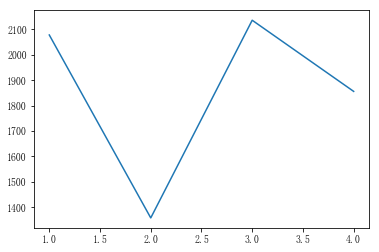

In [432]:
res.quarter.value_counts().sort_index().plot()

In [433]:
# res.quarter.value_counts().apply(lambda x: x/4).sort_index().plot()

In [434]:
# res.quarter.value_counts(normalize=True).head()

In [435]:
# res.quarter.value_counts(normalize=True).sort_index().head()

In [436]:
# res.quarter.value_counts(normalize=True).sort_index().plot()

## 4.2 根据微博创作时间（CREATDAT）及一年来每个月的发博量曲线将微博分为4个季节，并标记

In [437]:
# pd.reset_option('display.max_rows')

In [438]:
res['month'] = res.CREATDAT.dt.month
res.month

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
7398    4
7399    4
7400    4
7401    4
7402    4
7403    4
7404    4
7405    4
7406    4
7407    4
7408    4
7409    4
7410    4
7411    4
7412    4
7413    4
7414    4
7415    4
7416    4
7417    4
7418    4
7419    4
7420    4
7421    4
7422    4
7423    4
7424    4
7425    4
7426    4
7427    4
Name: month, Length: 7428, dtype: int64

In [439]:
res.month.value_counts()

8     912
1     851
12    771
7     740
2     667
10    585
3     560
5     553
6     552
11    500
9     484
4     253
Name: month, dtype: int64

In [440]:
res.month.value_counts().sort_index()

1     851
2     667
3     560
4     253
5     553
6     552
7     740
8     912
9     484
10    585
11    500
12    771
Name: month, dtype: int64

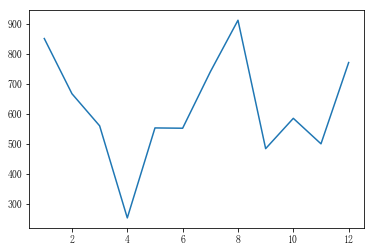

In [441]:
res.month.value_counts().sort_index().plot()

In [442]:
# res.month.value_counts().apply(lambda x: x/12).sort_index().plot()

In [443]:
# res['year'] = res.CREATDAT.dt.year
# res.year.head()

In [444]:
# res['day'] = res.CREATDAT.dt.day
# res.day.head()

In [445]:
# res['pandas_time'] = pd.to_datetime(res[['year', 'month', 'day']])
# res.pandas_time.head()

In [446]:
# res.to_csv('to_make_yyyy-m.csv', encoding='gb18030')
data = pd.read_csv('to_make_yyyy-m.csv', encoding='gb18030', usecols=[0, 2])
data.head()

,id,pandas_month
0,1149,2017/4
1,1150,2017/4
2,1151,2017/4
3,1152,2017/4
4,1153,2017/4


In [447]:
res = pd.merge(left=res, right=data, how='left', left_on='id', right_on='id')
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,PRO_NAME,LIST,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA,CREATDAT,quarter,month,pandas_month
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,未填,NaN,1,3,1,2017-04-27 13:58:50,2,4,2017/4
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,未填,NaN,1,3,1,2017-04-26 17:28:11,2,4,2017/4
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,未填,NaN,1,3,1,2017-04-26 17:27:11,2,4,2017/4
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,未填,NaN,1,3,1,2017-04-26 17:27:03,2,4,2017/4
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,未填,NaN,1,3,1,2017-04-26 17:25:52,2,4,2017/4
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,天气话你知,174.0,9,10,9,2017-04-27 16:15:00,2,4,2017/4
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,广州下班天气,未填,NaN,3,3,1,2017-04-27 17:01:06,2,4,2017/4
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,随手拍广州,175.0,4,4,8,2017-04-27 16:56:19,2,4,2017/4
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,小编8天气,126.0,4,3,3,2017-04-27 14:31:25,2,4,2017/4
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,小编8天气,126.0,9,7,8,2017-04-27 14:12:51,2,4,2017/4


In [451]:
res.pandas_month.describe()

count       7428
unique        13
top       2017/8
freq         912
Name: pandas_month, dtype: object

In [459]:
figure = res.pandas_month.value_counts().sort_index()
figure

2017/10    585
2017/11    500
2017/12    771
2017/4      47
2017/5     553
2017/6     552
2017/7     740
2017/8     912
2017/9     484
2018/1     851
2018/2     667
2018/3     560
2018/4     206
Name: pandas_month, dtype: int64

In [460]:
figure.to_csv('figure.csv')

In [203]:
res.month.dtype

dtype('int64')

In [151]:
res.loc[(res.month >= 3) & (res.month <= 5), 'season'] = '春季'
res.loc[(res.month >= 6) & (res.month <= 8), 'season'] = '夏季'
res.loc[(res.month >= 9) & (res.month <= 11), 'season'] = '秋季'
res.loc[(res.month == 12) | (res.month == 1) | (res.month == 2), 'season'] = '冬季'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,PRO_NAME,LIST,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA,CREATDAT,quarter,month,season
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,1,3,1,2017-04-27 13:58:50,2,4,春季
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,1,3,1,2017-04-26 17:28:11,2,4,春季
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,1,3,1,2017-04-26 17:27:11,2,4,春季
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,1,3,1,2017-04-26 17:27:03,2,4,春季
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,1,3,1,2017-04-26 17:25:52,2,4,春季
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,天气话你知,174.0,9,10,9,2017-04-27 16:15:00,2,4,春季
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,广州下班天气,NaN,NaN,3,3,1,2017-04-27 17:01:06,2,4,春季
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,随手拍广州,175.0,4,4,8,2017-04-27 16:56:19,2,4,春季
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,小编8天气,126.0,4,3,3,2017-04-27 14:31:25,2,4,春季
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,小编8天气,126.0,9,7,8,2017-04-27 14:12:51,2,4,春季


In [152]:
res.season.dtype

dtype('O')

## 4.3 根据微博创作时间（CREATDAT）及一年来每个月每天的发博量曲线将微博分为周几

In [462]:
res.columns

Index(['id', 'statdate', 'text', '所属分类', '预报内容', '预警内容', '预警级别', '预警信号',
       '微博种类', '是否包含链接', '越秀区', '海珠区', '荔湾区', '天河区', '白云区', '黄埔区', '花都区',
       '番禺区', '南沙区', '从化区', '增城区', '是否包含表情', 'length', '阴历', '星期', '是否周中或周末',
       '是否上班或节假日', 'ID', 'STATDATE', 'STATID', 'CREATETIME', 'UPDATETIME',
       'TASKID', 'TASKCHANNELID', 'WEIBOID', 'YUEDU', 'COMM', 'REP', 'PRA',
       'CREATEDAT', 'TEXT', 'PRO_WBNAME', 'PROID', 'PRO_NAME', 'LIST',
       'LISTID', 'grade_of_COMM', 'grade_of_REP', 'grade_of_PRA', 'CREATDAT',
       'quarter', 'month', 'pandas_month'],
      dtype='object')

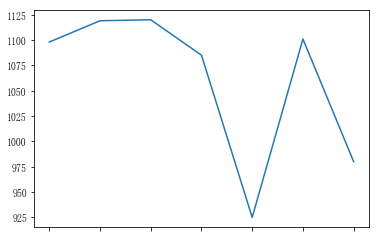

In [468]:
res.星期.value_counts().sort_index().plot()

In [470]:
res.星期.value_counts().apply(lambda x: x/52).sort_index()

一    21.115385
三    21.519231
二    21.538462
五    20.865385
六    17.788462
四    21.173077
日    18.846154
Name: 星期, dtype: float64

## 4.4 根据微博创作时间（CREATDAT）及一年来每天每小时的发博量曲线将微博分为4个时段，并标记

In [471]:
res['hour'] = res.CREATDAT.dt.hour

In [472]:
res.hour.head()

0    13
1    17
2    17
3    17
4    17
Name: hour, dtype: int64

In [473]:
res.hour.value_counts().head()

17    610
12    601
16    597
10    561
14    538
Name: hour, dtype: int64

In [474]:
res.hour.value_counts().sort_index()

0      39
1      13
2      20
3      21
4      28
5      65
6     315
7     522
8     486
9     518
10    561
11    487
12    601
13    138
14    538
15    443
16    597
17    610
18    221
19    247
20    265
21    232
22    284
23    177
Name: hour, dtype: int64

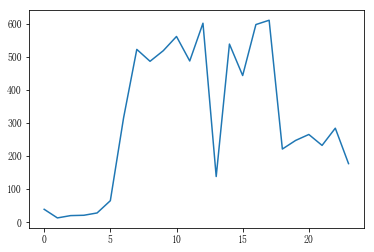

In [475]:
res.hour.value_counts().sort_index().plot()

In [478]:
res.hour.value_counts().apply(lambda x: x/366).sort_index()

0     0.106557
1     0.035519
2     0.054645
3     0.057377
4     0.076503
5     0.177596
6     0.860656
7     1.426230
8     1.327869
9     1.415301
10    1.532787
11    1.330601
12    1.642077
13    0.377049
14    1.469945
15    1.210383
16    1.631148
17    1.666667
18    0.603825
19    0.674863
20    0.724044
21    0.633880
22    0.775956
23    0.483607
Name: hour, dtype: float64

In [477]:
res.loc[(res.hour >= 0) & (res.hour < 6), 'split_day'] = '凌晨'
res.loc[(res.hour >= 6) & (res.hour < 12), 'split_day'] = '上午'
res.loc[(res.hour >= 12) & (res.hour < 18), 'split_day'] = '下午'
res.loc[(res.hour >= 18) & (res.hour < 24), 'split_day'] = '晚上'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA,CREATDAT,quarter,month,pandas_month,hour,split_day
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,1,3,1,2017-04-27 13:58:50,2,4,2017/4,13,下午
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2017-04-26 17:28:11,2,4,2017/4,17,下午
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2017-04-26 17:27:11,2,4,2017/4,17,下午
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2017-04-26 17:27:03,2,4,2017/4,17,下午
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2017-04-26 17:25:52,2,4,2017/4,17,下午
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,174.0,9,10,9,2017-04-27 16:15:00,2,4,2017/4,16,下午
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,3,3,1,2017-04-27 17:01:06,2,4,2017/4,17,下午
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,175.0,4,4,8,2017-04-27 16:56:19,2,4,2017/4,16,下午
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,126.0,4,3,3,2017-04-27 14:31:25,2,4,2017/4,14,下午
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,126.0,9,7,8,2017-04-27 14:12:51,2,4,2017/4,14,下午


# 五、根据微博长度（length）及其分位数将微博分为4种长度，并标记

In [160]:
res.length.describe()

count    7428.000000
mean       76.307485
std        44.718427
min         2.000000
25%        38.000000
50%        71.000000
75%       112.000000
max       220.000000
Name: length, dtype: float64

In [161]:
res.loc[(res.length > 0) & (res.hour <= 38), 'size'] = '短微博'
res.loc[(res.length > 38) & (res.hour <= 71), 'size'] = '较短微博'
res.loc[(res.length > 71) & (res.hour <= 112), 'size'] = '较长微博'
res.loc[(res.length > 112) & (res.hour <= 220), 'size'] = '长微博'
res

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,grade_of_COMM,grade_of_REP,grade_of_PRA,CREATDAT,quarter,month,season,hour,split_day,size
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,1,3,1,2017-04-27 13:58:50,2,4,春季,13,下午,短微博
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2017-04-26 17:28:11,2,4,春季,17,下午,短微博
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2017-04-26 17:27:11,2,4,春季,17,下午,短微博
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2017-04-26 17:27:03,2,4,春季,17,下午,短微博
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2017-04-26 17:25:52,2,4,春季,17,下午,短微博
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,9,10,9,2017-04-27 16:15:00,2,4,春季,16,下午,长微博
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,3,3,1,2017-04-27 17:01:06,2,4,春季,17,下午,长微博
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,4,4,8,2017-04-27 16:56:19,2,4,春季,16,下午,短微博
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,4,3,3,2017-04-27 14:31:25,2,4,春季,14,下午,较短微博
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,9,7,8,2017-04-27 14:12:51,2,4,春季,14,下午,短微博


In [162]:
# # 根据评论数（COMM）及其分位数将微博分为2种，并标记

# res.COMM.describe()

# res.loc[(res.COMM < 14.5 ), 'num_of_COMM'] = 'more'
# res.loc[(res.COMM >= 14.5 ), 'num_of_COMM'] = 'less'
# res

# # 根据点赞数（PRA）及其分位数将微博分为2种，并标记

# res.PRA.describe()

# res.loc[(res.PRA < 10 ), 'num_of_PRA'] = 'more'
# res.loc[(res.PRA >= 10 ), 'num_of_PRA'] = 'less'
# res

# # 根据点赞数（REP）及其分位数将微博分为2种，并标记

# res.REP.describe()

# res.loc[(res.REP < 2 ), 'num_of_REP'] = 'more'
# res.loc[(res.REP >= 2 ), 'num_of_REP'] = 'less'
# res

In [163]:
res.drop(['length', 
          '阴历', 
          'ID', 
          'STATDATE', 
          'STATID', 
          'CREATETIME', 
          'UPDATETIME', 
          'TASKID', 
          'TASKCHANNELID', 
          'WEIBOID', 
          'YUEDU', 
          'CREATDAT', 
          'TEXT', 
          'CREATEDAT'], 
          axis=1, 
          inplace=True
          )

In [164]:
# res.drop(['CREATDAT'], 
#           axis=1, 
#           inplace=True
#           )

In [165]:
res.rename(columns={'预报内容': 'forecast', 
                    '预警内容': 'alert_content', 
                    '预警级别': 'alert_level', 
                    '预警信号': 'alert_signal', 
                    '微博种类': 'origin', 
                    '是否包含链接': 'link', 
                    '星期':'day_of_week', 
                    '是否周中或周末': 'weekend', 
                    '是否上班或节假日': 'work', 
                    '所属分类': 'LDA_cluster',
                    '越秀区': 'yuexiuqu',
                    '海珠区': 'haizhuqu',
                    '荔湾区': 'liwanqu',
                    '天河区': 'tianhequ',
                    '白云区': 'baiyunqu',
                    '黄埔区': 'huangpuqu',
                    '花都区': 'huaduqu',
                    '番禺区': 'panyuqu',
                    '南沙区': 'nanshaqu',
                    '从化区': 'conghuaqu',
                    '增城区': 'zengchengqu'
                   }, inplace=True) 

In [166]:
res.head()

,id,statdate,text,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,...,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,1,3,1,2,4,春季,13,下午,短微博
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2,4,春季,17,下午,短微博
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2,4,春季,17,下午,短微博
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2,4,春季,17,下午,短微博
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,1,3,1,2,4,春季,17,下午,短微博


# 六、根据微博内容对自动发送或小编发送

In [167]:
res.isnull().tail()

,id,statdate,text,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,...,LISTID,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size
7423,False,False,False,False,True,True,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
7424,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7425,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7426,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7427,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [168]:
res.isnull().sum()

id                  0
statdate            0
text                0
LDA_cluster         0
forecast         6043
alert_content    6183
alert_level      6793
alert_signal     6269
origin              0
link                0
yuexiuqu         7233
haizhuqu         7215
liwanqu          7239
tianhequ         7209
baiyunqu         7155
huangpuqu        7199
huaduqu          7048
panyuqu          7065
nanshaqu         7103
conghuaqu        7071
zengchengqu      7103
是否包含表情            309
day_of_week         0
weekend             0
work             6923
COMM                0
REP                 0
PRA                 0
PRO_WBNAME       4213
PROID            6105
PRO_NAME         6105
LIST             2386
LISTID           2386
grade_of_COMM       0
grade_of_REP        0
grade_of_PRA        0
quarter             0
month               0
season              0
hour                0
split_day           0
size                0
dtype: int64

In [169]:
res.loc[~(res.text.str.contains('#')), '发送方式'] = '自动发送'
res.loc[res.text.str.contains('#'), '发送方式'] = '小编发送'
res

,id,statdate,text,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,发送方式
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,1,3,1,2,4,春季,13,下午,短微博,自动发送
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,9,10,9,2,4,春季,16,下午,长微博,小编发送
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,3,3,1,2,4,春季,17,下午,长微博,自动发送
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,4,4,8,2,4,春季,16,下午,短微博,小编发送
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,4,3,3,2,4,春季,14,下午,较短微博,小编发送
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,9,7,8,2,4,春季,14,下午,短微博,小编发送


In [170]:
res.发送方式.value_counts()

小编发送    5045
自动发送    2383
Name: 发送方式, dtype: int64

In [171]:
res.rename(columns={'发送方式': 'send_way'}, inplace=True) 

In [172]:
res.head()

,id,statdate,text,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,1,3,1,2,4,春季,13,下午,短微博,自动发送
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,1,3,1,2,4,春季,17,下午,短微博,自动发送


In [173]:
res.to_csv('text_labelled.csv', encoding='gb18030')

# 文本标签dummy化

In [174]:
res_dummy = pd.get_dummies(res,
                           columns=['预报内容', 
                                    '预警内容', 
                                    '预警级别', 
                                    '预警持续期', 
                                    '微博种类', 
                                    '是否包含链接', 
                                    '星期', 
                                    '是否周中或周末', 
                                    '是否上班或节假日', 
                                    '所属分类', 
                                    'PRO_WBNAME', 
                                    'PRO_NAME', 
                                    'LIST', 
                                    '所属时段', 
                                    '所属季度', 
                                    '所属季节', 
                                    '微博长度'],
                          drop_first=True
                          )
res_dummy.head()

ValueError: labels ['预报内容' '预警内容' '预警级别' '预警持续期' '微博种类' '是否包含链接' '星期' '是否周中或周末' '是否上班或节假日'
 '所属分类' '所属时段' '所属季度' '所属季节' '微博长度'] not contained in axis

In [110]:
res_dummy.shape

NameError: name 'res_dummy' is not defined

In [111]:
res_dummy.drop(['阴历', 
                'ID', 
                'STATDATE', 
                'STATID', 
                'CREATETIME', 
                'UPDATETIME', 
                'TASKID', 
                'TASKCHANNELID', 
                'WEIBOID', 
                'YUEDU', 
                'CREATDAT', 
                'TEXT', 
                'CREATDAT'], 
               axis=1, 
               inplace=True
              )

NameError: name 'res_dummy' is not defined

In [112]:
res_dummy.shape

NameError: name 'res_dummy' is not defined

In [113]:
res_dummy.to_csv('文本标签dummy化.csv', encoding='gb18030')

NameError: name 'res_dummy' is not defined